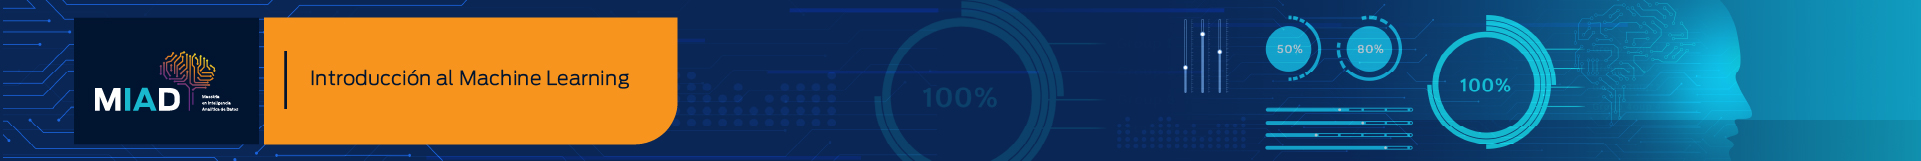

# Introducción al Machine Learning - Semana 6
## Caso: implementación de metodologías de imputación de variables e imbalanceo de clases


### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para gestionar situaciones de datos faltantes e imbalanceo de clases.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Primer conjunto de datos

Utilice el archivo de datos "Missing data.csv" que se encuentra en este repositorio para hacer los siguientes tres puntos:

### 1. Análisis preliminar de variables del primer conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el primer conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [20]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/edgarbalaguera/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [21]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [12]:
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [4]:
df1 = pd.read_csv('./MissingData.csv')
df1.head()

,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Gestión de datos faltantes (25 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Con la muestra de entrenamiento, realicen un procedimiento de imputación simple multivariada para todas las variables que tengan datos faltantes en sus filas.

In [5]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
#Dimensiones originales de dataset
df1.shape




(683, 36)

In [6]:
#Variables de dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            683 non-null    object 
 1   date             682 non-null    float64
 2   plant.stand      647 non-null    float64
 3   precip           645 non-null    float64
 4   temp             653 non-null    float64
 5   hail             562 non-null    float64
 6   crop.hist        667 non-null    float64
 7   area.dam         682 non-null    float64
 8   sever            562 non-null    float64
 9   seed.tmt         562 non-null    float64
 10  germ             571 non-null    float64
 11  plant.growth     667 non-null    float64
 12  leaves           683 non-null    int64  
 13  leaf.halo        599 non-null    float64
 14  leaf.marg        599 non-null    float64
 15  leaf.size        599 non-null    float64
 16  leaf.shread      583 non-null    float64
 17  leaf.malf       

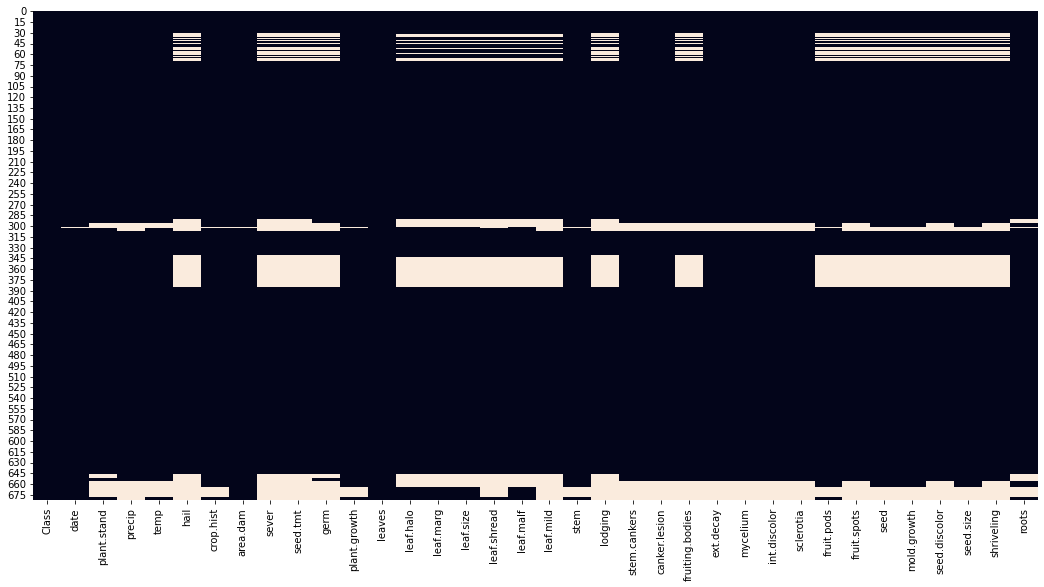

In [7]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [6]:
for i, col in enumerate(df1.columns):
    print(df1[col].describe(), '\n')

count            683
unique            19
top       brown-spot
freq              92
Name: Class, dtype: object 

count    682.000000
mean       3.554252
std        1.694117
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: date, dtype: float64 

count    647.000000
mean       0.452859
std        0.498158
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: plant.stand, dtype: float64 

count    645.000000
mean       1.596899
std        0.686147
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: precip, dtype: float64 

count    653.000000
mean       1.182236
std        0.628214
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: temp, dtype: float64 

count    562.000000
mean       0.225979
std        0.418598
min        0.000000
25%        0.000000
50%        0.000000
75

/var/folders/_z/zc59h4tx495fcfjfjh_cscd40000gn/T/ipykernel_30624/113291770.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


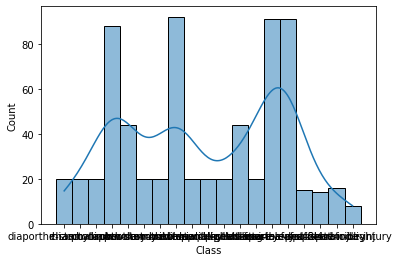

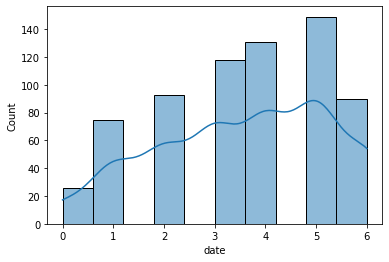

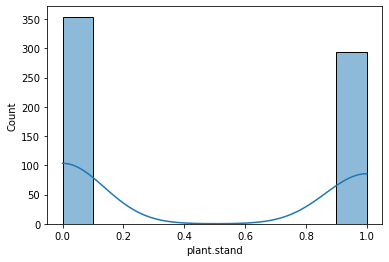

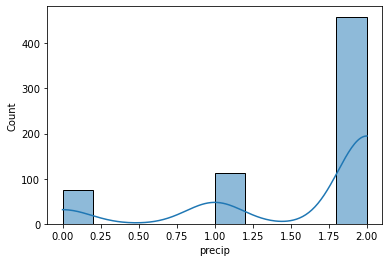

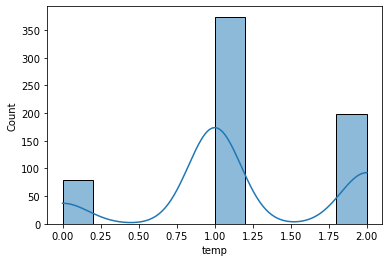

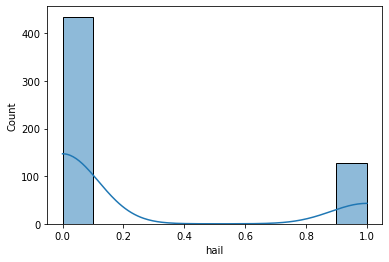

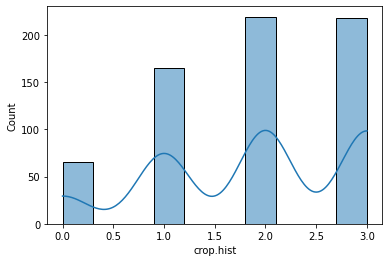

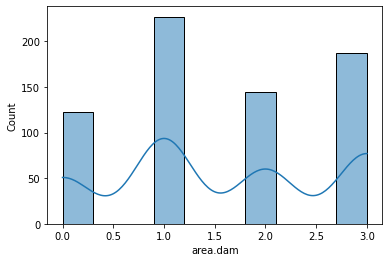

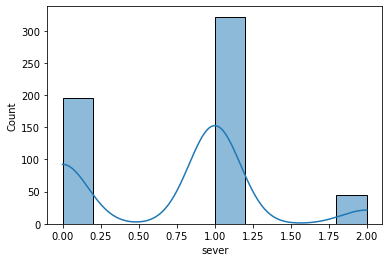

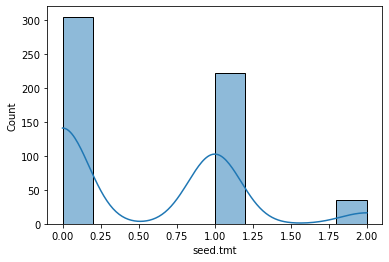

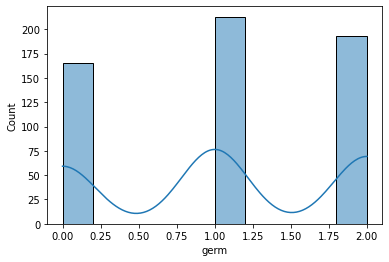

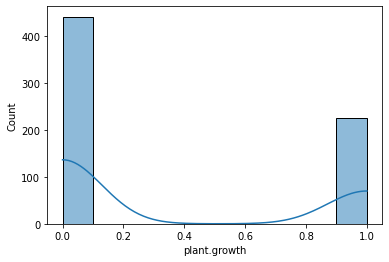

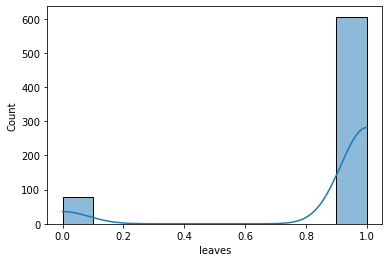

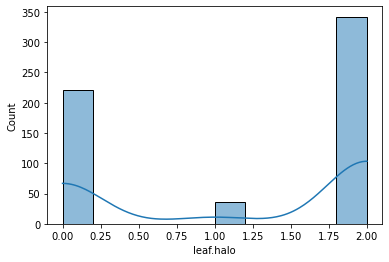

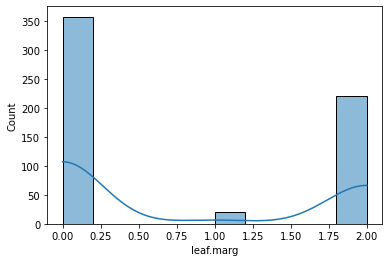

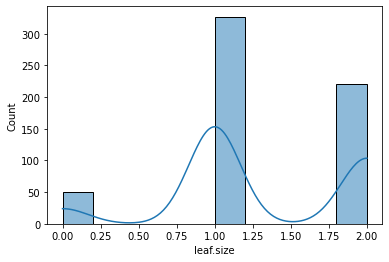

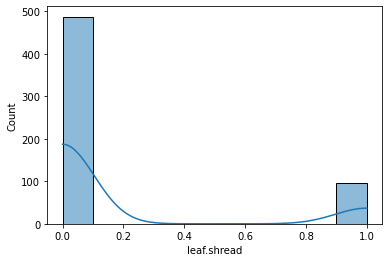

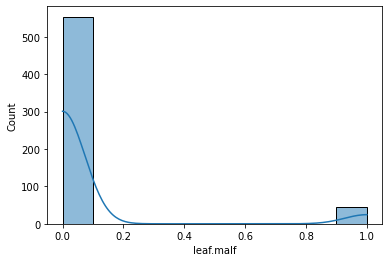

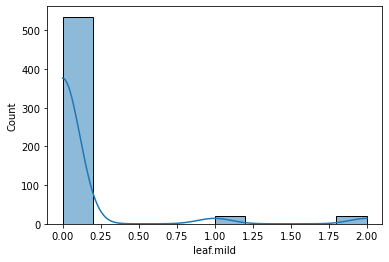

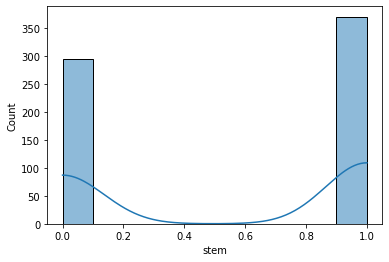

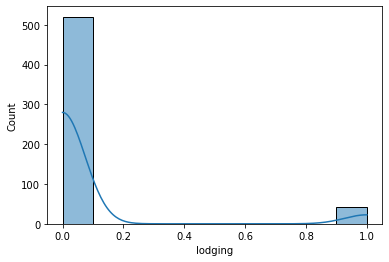

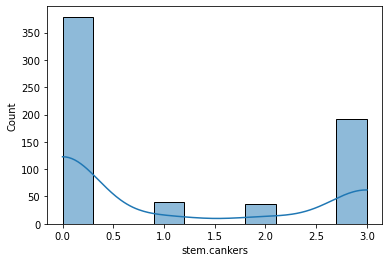

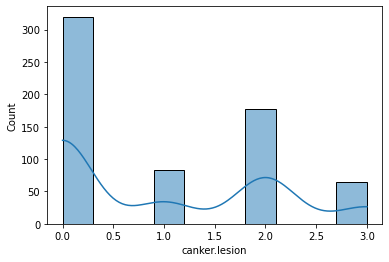

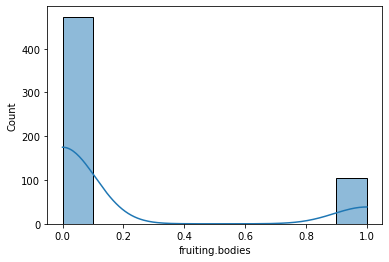

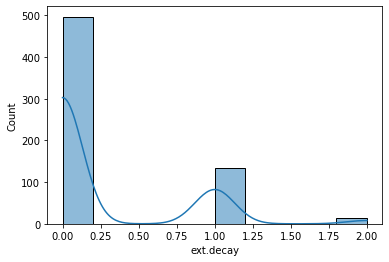

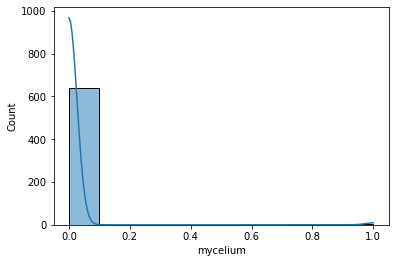

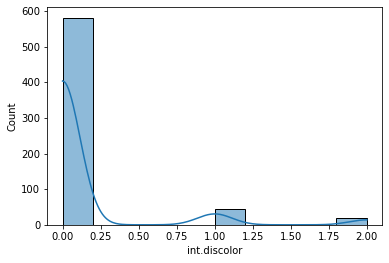

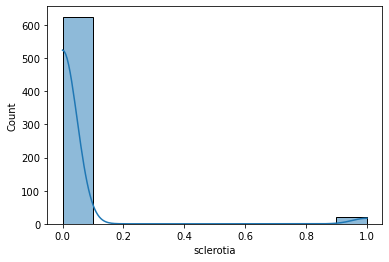

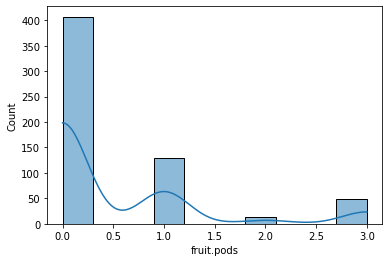

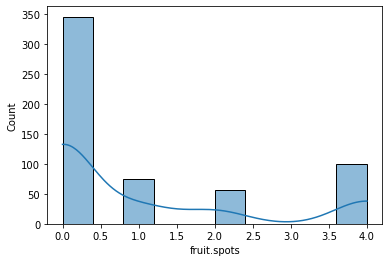

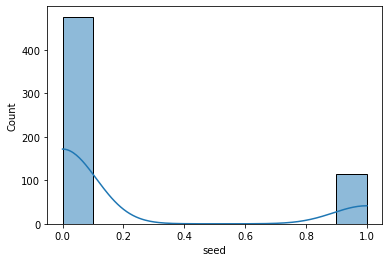

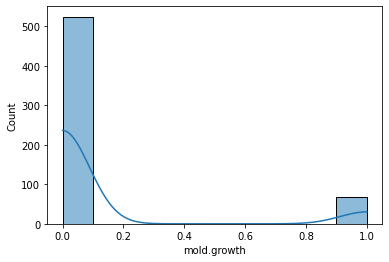

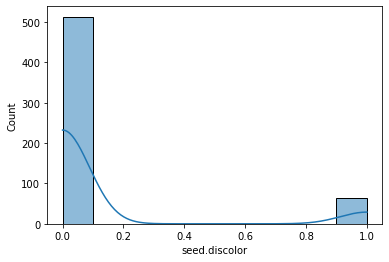

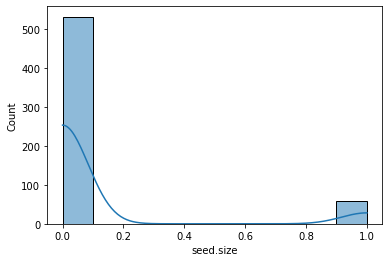

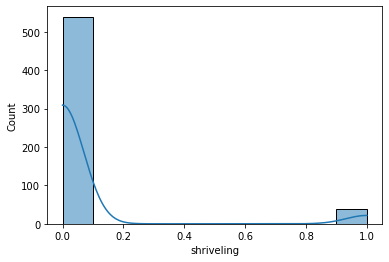

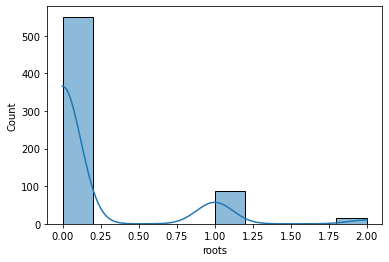

In [7]:
#Histogramas
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(df1[col], bins=10, kde=True)

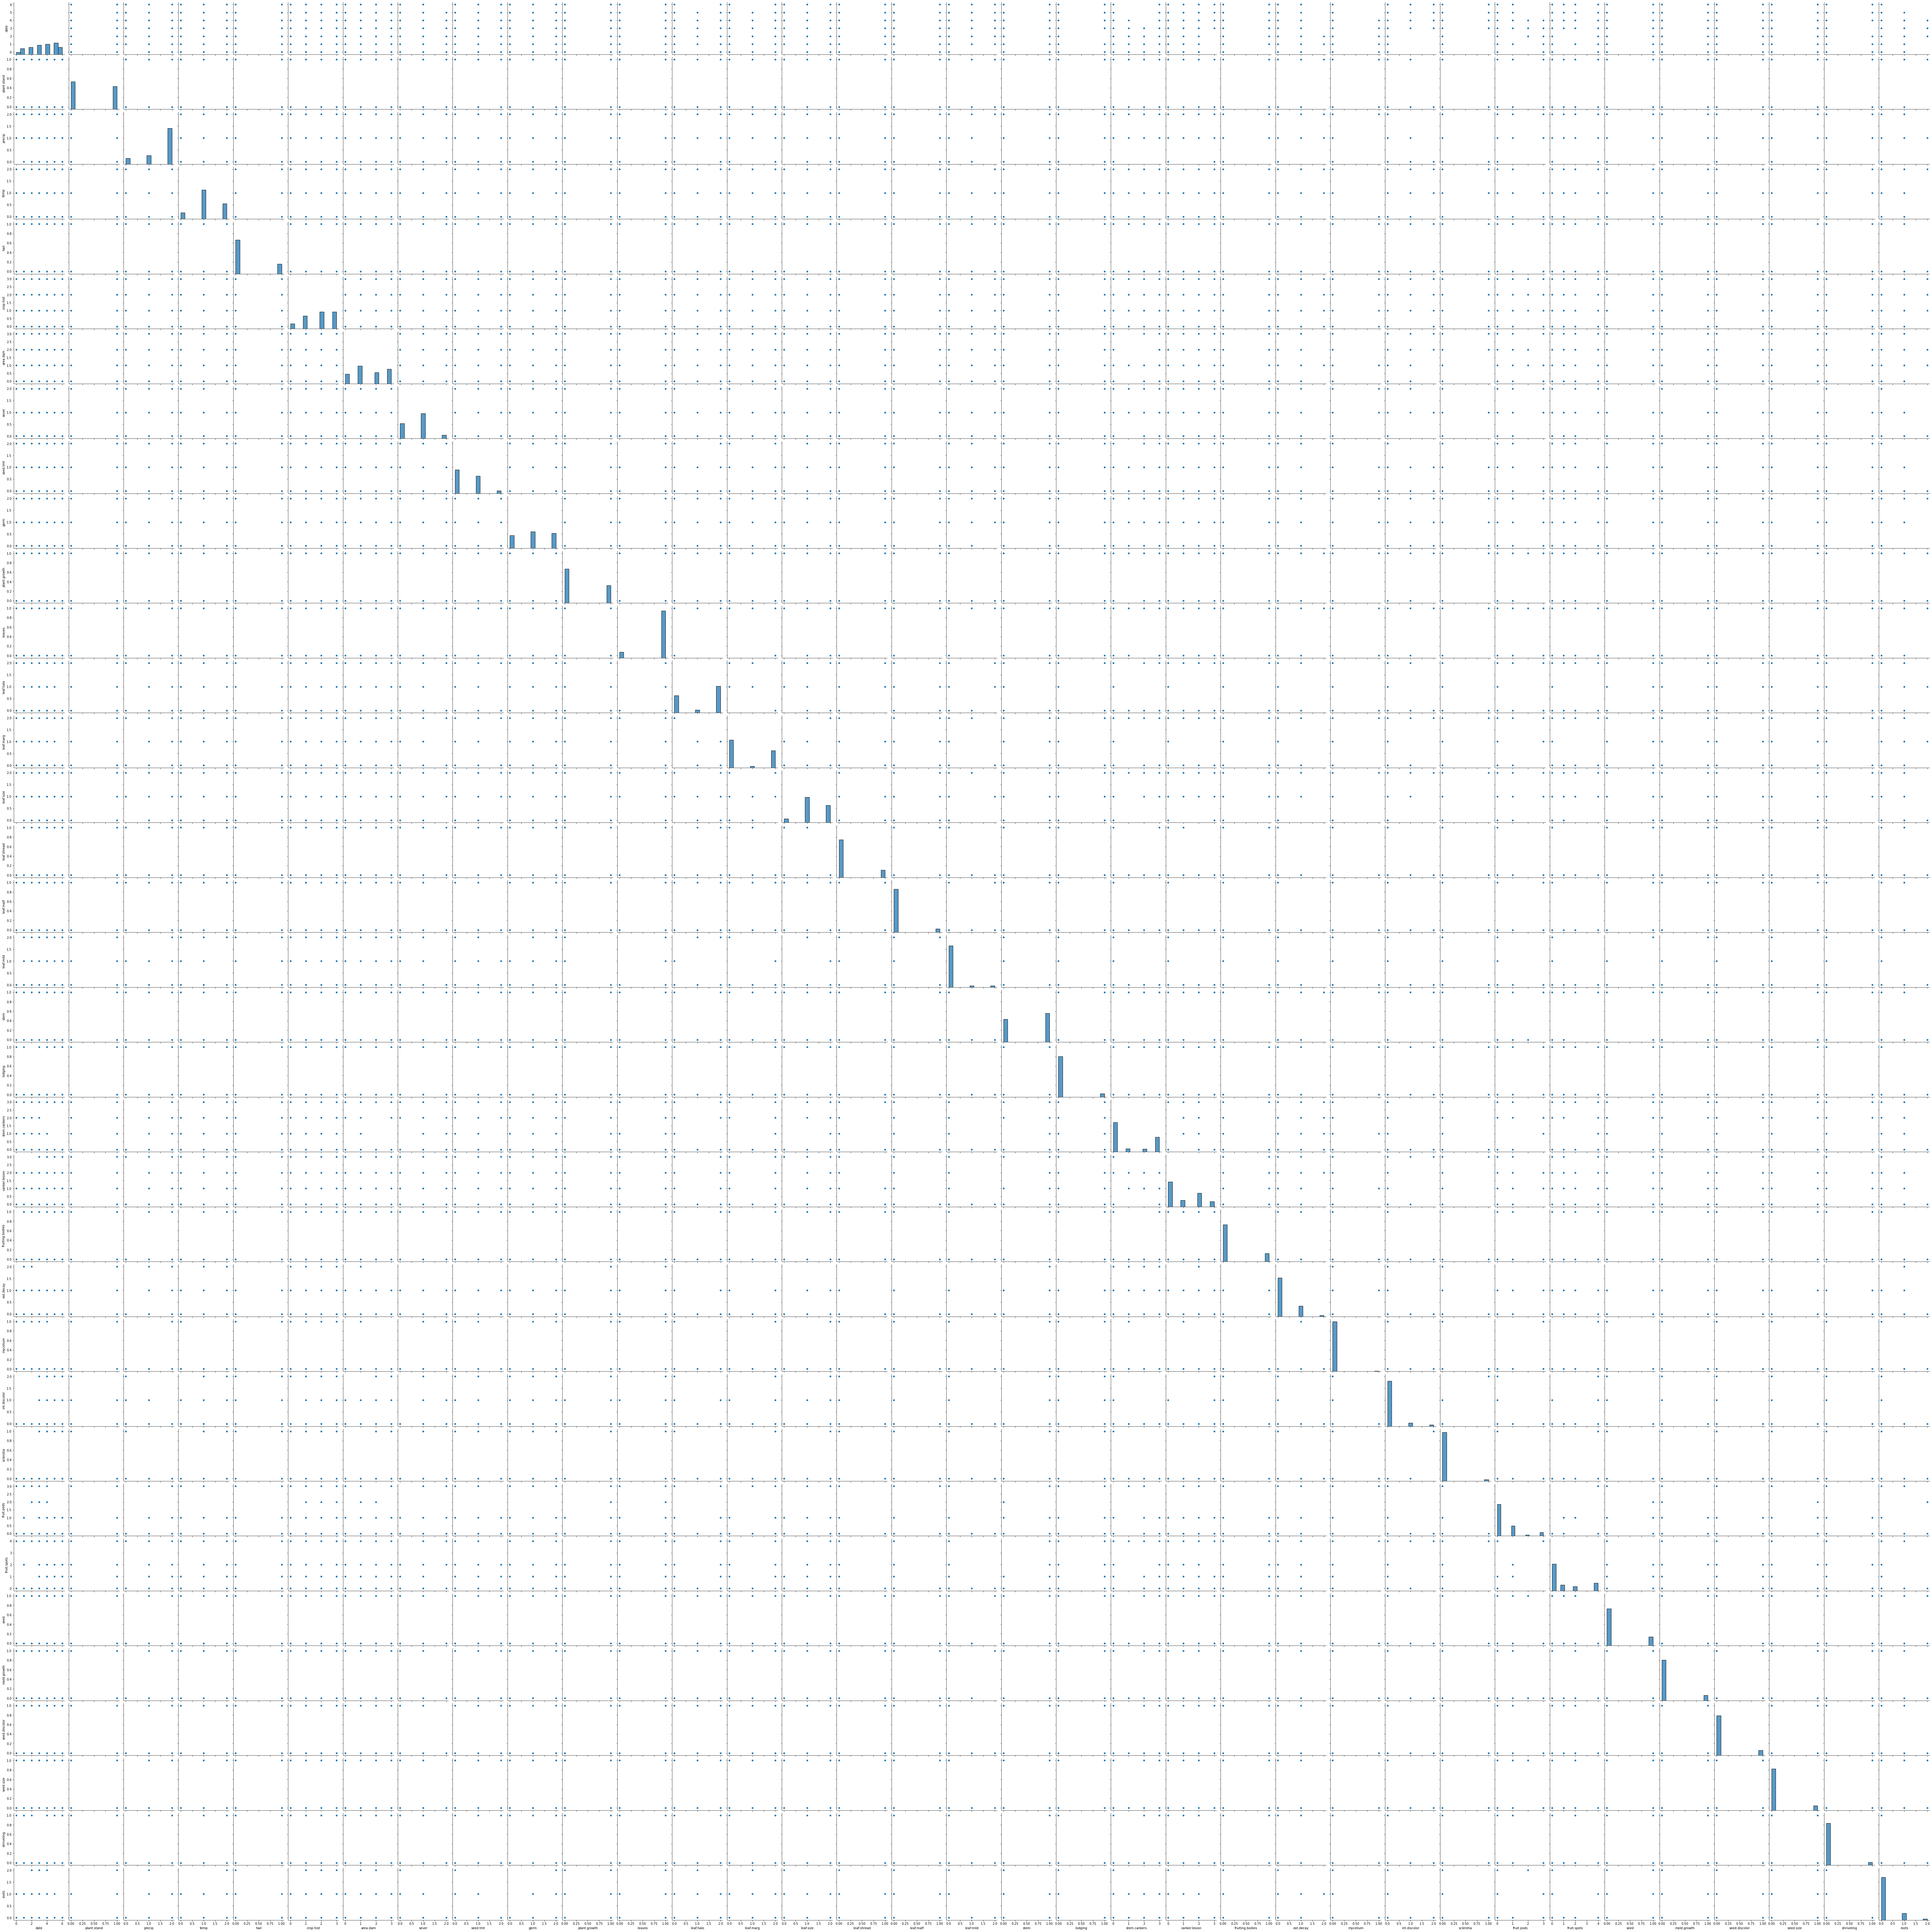

In [8]:
#Correlograma
sns.pairplot(df1, kind='scatter')
plt.show()

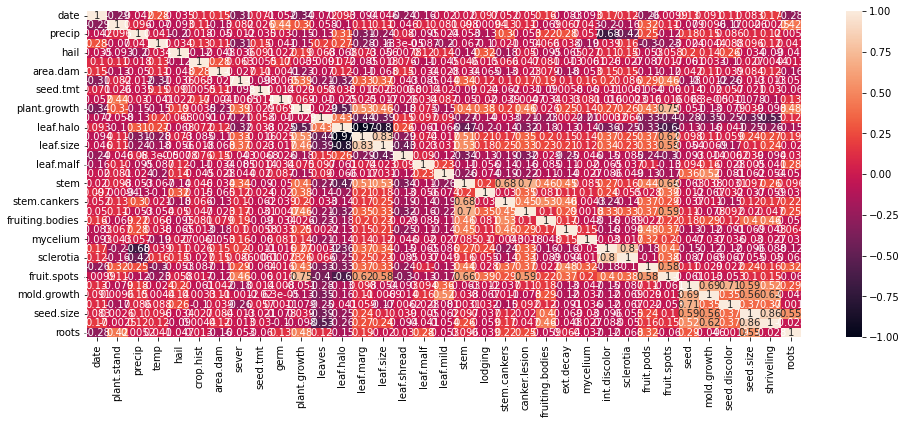

In [9]:
#Mapa de calor
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

### Conclusiones:


(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de modelo de clasificación (10 puntos)
Escojan un modelo de clasificación de los vistos en la semana 3 del curso e impleméntenlo. Evalúen su poder predictivo en la muestra de evaluación debidamente transformada, de acuerdo a la imputación hecha en el conjunto entrenamiento.

In [46]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####


XTotal = df1.drop(['Class'], axis=1).to_numpy()
yTotal = df1['Class'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

imp = IterativeImputer(max_iter=100, random_state=0)
imp.fit(XTrain)
XTrainImputado=pd.DataFrame(imp.transform(XTrain))

imp2 = IterativeImputer(max_iter=100, random_state=0)
imp2.fit(XTest)

XTestImputado=pd.DataFrame(imp.transform(XTest))
yTest_pd=pd.DataFrame(yTest)
print(XTestImputado)



      0         1         2         3         4    5    6         7   \
0    2.0  0.000000  2.000000  1.000000  0.000000  1.0  0.0  1.000000   
1    4.0  1.000000  1.000000  1.000000  0.435227  1.0  1.0  0.766754   
2    1.0  1.000000  2.085262  0.000000  0.335428  1.0  0.0  0.937032   
3    4.0  0.000000  2.000000  2.000000  1.000000  0.0  0.0  0.000000   
4    4.0  1.273414  1.849815  1.519376  0.529856  2.0  1.0  0.218336   
..   ...       ...       ...       ...       ...  ...  ...       ...   
221  5.0  1.000000  1.000000  1.000000  0.000000  2.0  3.0  2.000000   
222  1.0  1.000000  2.000000  1.000000  0.269602  2.0  1.0  0.865313   
223  3.0  0.000000  2.000000  1.000000  0.000000  2.0  3.0  2.000000   
224  4.0  0.000000  2.000000  1.000000  1.000000  0.0  0.0  0.000000   
225  5.0  0.000000  2.000000  1.000000  0.000000  1.0  1.0  0.000000   

           8         9   ...        25        26        27        28  \
0    2.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0

In [47]:
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrainImputado,yTrain)

LogisticRegression(max_iter=10000, random_state=0)

In [48]:
prediccionesRegLog=clfRegLog.predict(XTestImputado)
prediccionesProbRegLog=clfRegLog.predict_proba(XTestImputado)

In [50]:
errorRegLog=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesRegLog[i]):
        errorRegLog+=1/len(yTest)
        
print('El error de clasificación para la regresión logística en la muestra de test es:')
print(errorRegLog)

El error de clasificación para la regresión logística en la muestra de test es:
0.048672566371681415


(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### Segundo conjunto de datos

Para los siguientes cinco puntos, utilice la base de datos "raw_df" que tiene información sobre tarjetas de crédito y se descarga con las siguientes líneas de código:

In [19]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
raw_df.shape

(284807, 31)

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 4. Análisis preliminar de variables del segundo conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el segundo conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [22]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
raw_df.shape






(284807, 31)

In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

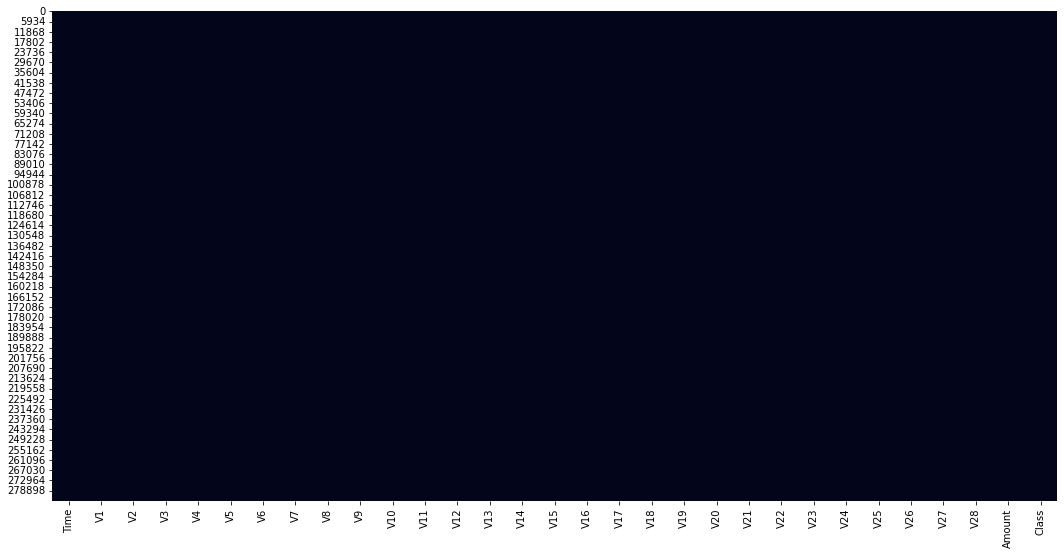

In [25]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(raw_df.isnull(), cbar=False)
plt.show()

/var/folders/_z/zc59h4tx495fcfjfjh_cscd40000gn/T/ipykernel_1123/2638119085.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


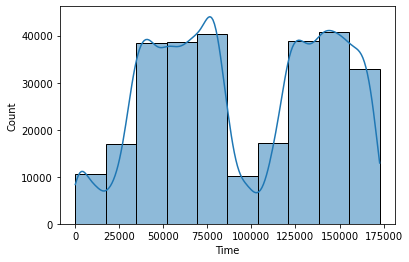

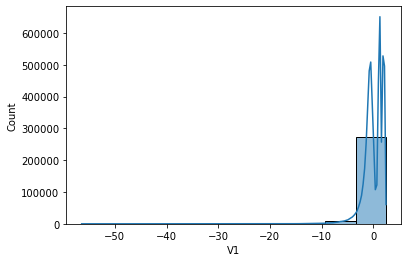

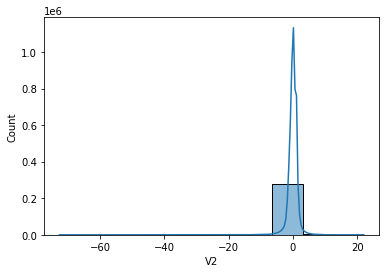

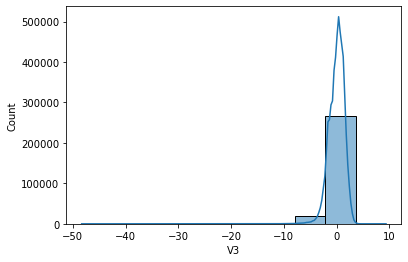

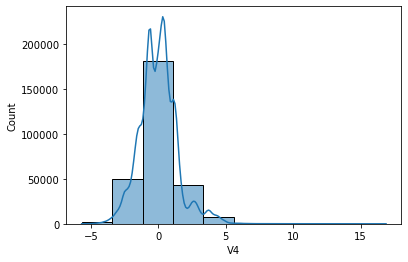

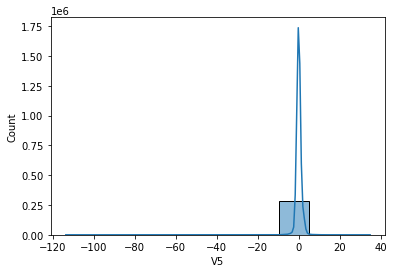

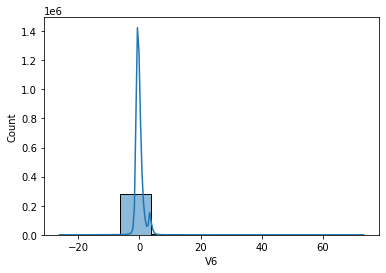

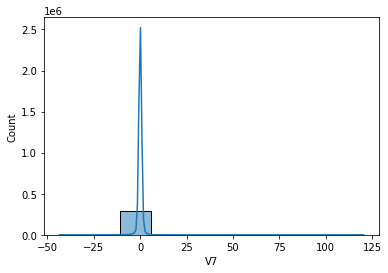

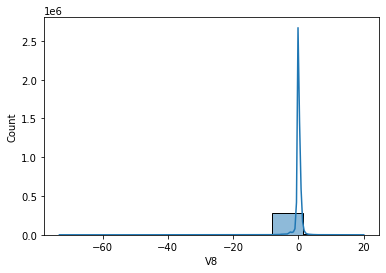

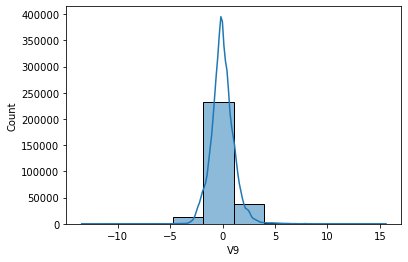

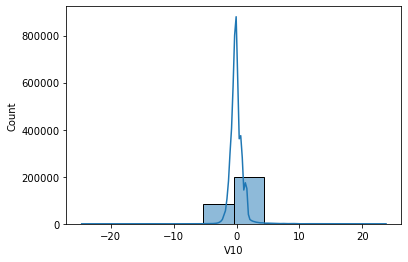

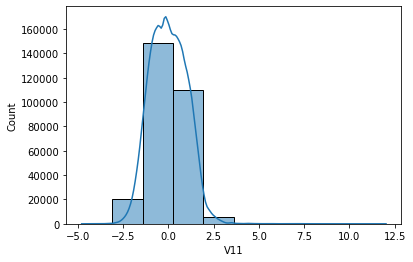

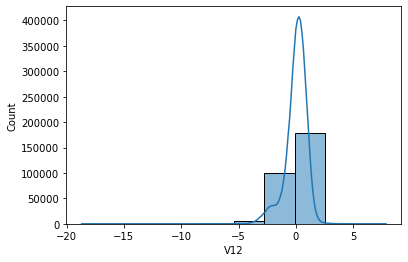

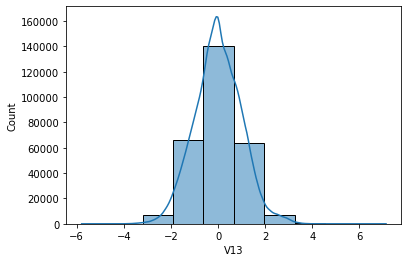

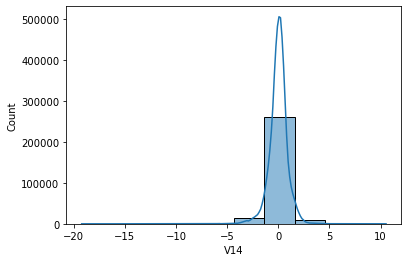

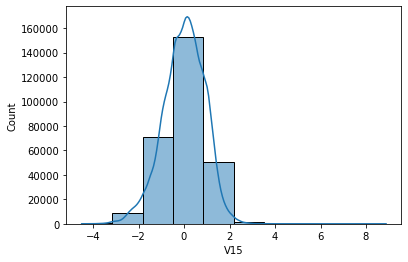

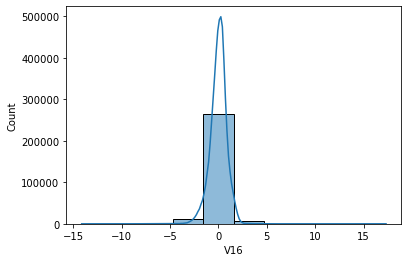

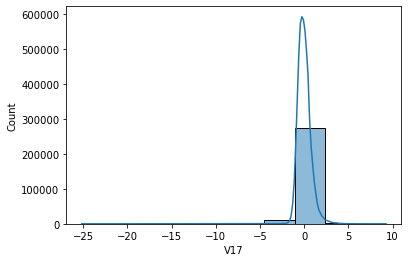

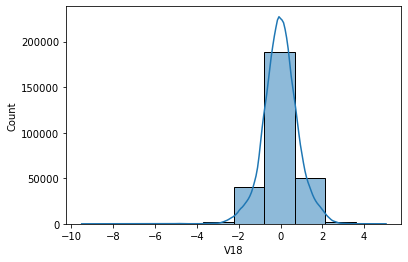

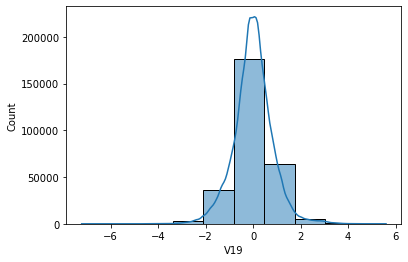

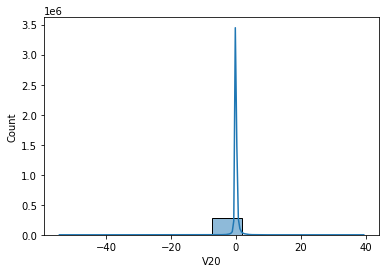

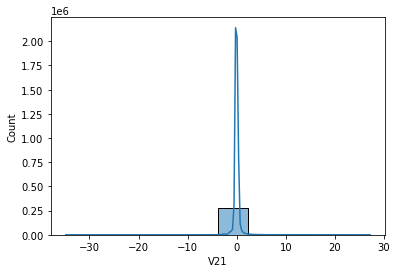

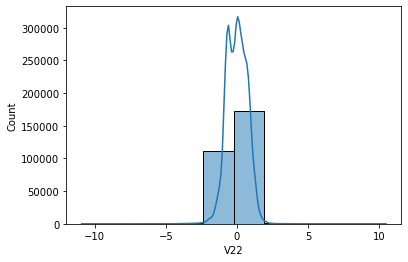

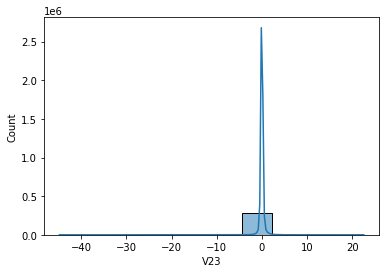

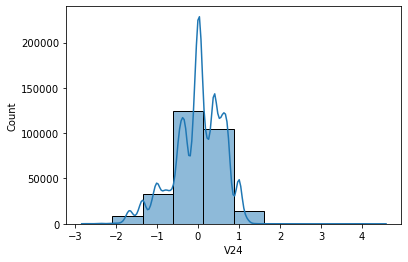

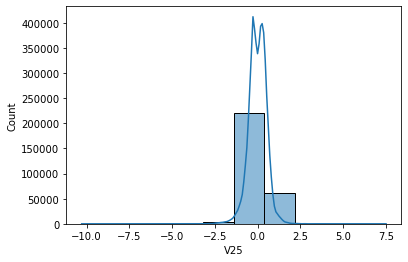

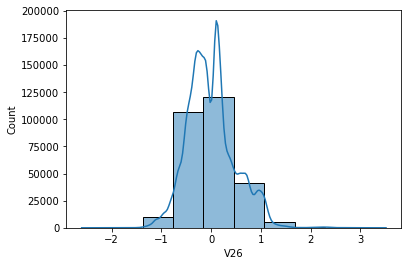

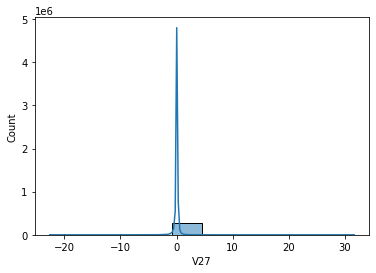

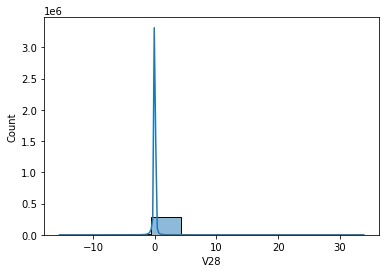

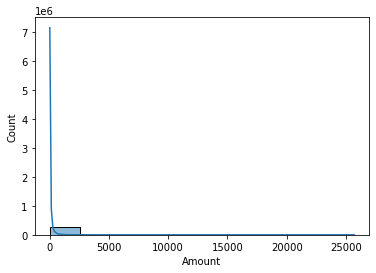

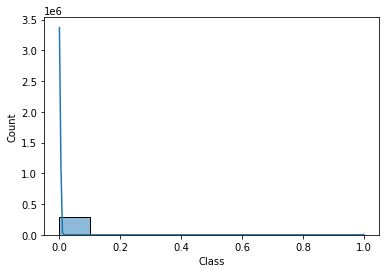

In [67]:
#Histogramas
for i, col in enumerate(raw_df.columns):
    plt.figure(i)
    sns.histplot(raw_df[col], bins=10, kde=True)

In [70]:
#conteo de la variable categorica
pd.value_counts(raw_df['Class'])

0    284315
1       492
Name: Class, dtype: int64

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Implementación de QDA (10 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Una vez se ha hecho esto, calibren un modelo QDA con la muestra de entrenamiento y evalúen su poder predictivo en la muestra de evaluación.

In [58]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

XTotal1 = raw_df.drop(['Amount', 'Class'], axis=1).to_numpy()
yTotal1 = raw_df['Class'].to_numpy()

#Partición de datos
XTrain1, XTest1, yTrain1, yTest1 = train_test_split(XTotal1, yTotal1, test_size=0.33, random_state=0)


clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain1, yTrain1)

prediccionesQDA = clfQDA.predict(XTest1)
prediccionesProbQDA = clfQDA.predict_proba(XTest1)


Error de predicción:
0.022981901752370217

Matriz de confusión:
[[91687  2138]
 [   22   140]]

Accuracy:
0.97701809824763

Precisión:
0.061457418788410885

Curva ROC y AUC:


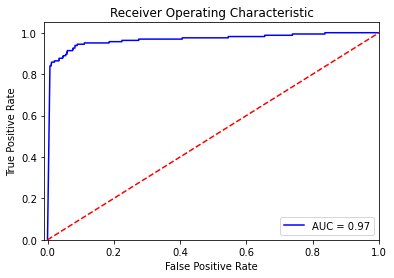

In [65]:
errorQDA = 0
for i in range(0, len(yTest1)):
    if(yTest1[i] != prediccionesQDA[i]):
        errorQDA += 1/len(yTest1)
print('Error de predicción:')
print(errorQDA)
print('')

#Matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_true = yTest1, y_pred = prediccionesQDA))
print('')

#Accuracy
print('Accuracy:')
accuracyQDA = accuracy_score(y_true = yTest1, y_pred = prediccionesQDA)
print(accuracyQDA)
print('')

#Precisión
print('Precisión:')
precisionQDA = precision_score(y_true = yTest1, y_pred = prediccionesQDA)
print(precisionQDA)
print('')


print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest1, prediccionesProbQDA[:, 1], pos_label = 1)
AUCQDA = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



### Conclusiones:
Para la implementación del modelo se realizó la partición con un 67% de datos para el entrenamiento y 33% de los datos para la evalución, el error de predicción es muy bajo alredor del 2% , el AUC es 0.97 lo que indica una tasa alta de verdaderos positivos, en general el modelo tiene un valor alto de predicción pero tiene presenta inconsistencias en la presición. Al evaluar la precisión del modelo este parámetro es muy bajo tan solo del 6.1%, este problema podría estar asociado al desbalanceo de la variable categorica ya que la clase 1 tan solo representa el 1.7% de los datos.

### 6. Gestión de imbalanceo de clases (25 puntos)
Realicen un procedimiento para gestionar las clases imbalanceadas de la base de datos con el conjunto de entrenamiento. 

In [3]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Implementación de random forest (10 puntos)
Estimen un modelo random forest para predecir la variable de respuesta y midan su desempeño en la muestra de evaluación.

In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 7 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 7)

### 8. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los dos modelos estimados (QDA sin balancear y random forest balanceando) en este caso resulta mejor para la predicción de la variable de respuesta en la segunda base de datos? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 8)